In [1]:
import pandas as pd

df = pd.read_csv("Updated_sales.csv")
print(df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [2]:
df = df.dropna(how='all')  # Remove all-empty rows
df = df.dropna(subset=['Order ID', 'Order Date', 'Quantity Ordered', 'Price Each'])

# Convert types
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna()

# Add Revenue column
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']


C:\Users\parma\AppData\Local\Temp\ipykernel_25280\3747621083.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [3]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


In [4]:
monthly_summary = df.groupby(['Year', 'Month']).agg({
    'Revenue': 'sum',
    'Order ID': 'nunique'
}).reset_index()

monthly_summary.rename(columns={'Order ID': 'Order Volume'}, inplace=True)
print(monthly_summary)


   Year  Month     Revenue  Order Volume
0  2019      4  3385499.82         17511
1  2019      5    10559.29            26
2  2019      8  2242315.57         11469
3  2019      9     2096.74            12


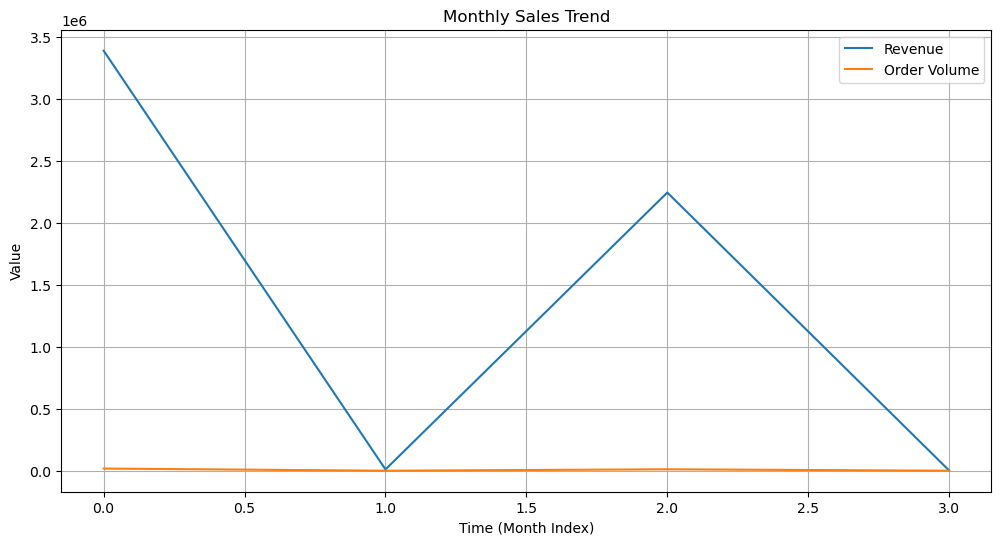

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_summary['Revenue'], label='Revenue')
plt.plot(monthly_summary['Order Volume'], label='Order Volume')
plt.title('Monthly Sales Trend')
plt.xlabel('Time (Month Index)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
